## K-Means Clustering Algorithm
to cluster a dataset into groups of similar characteristics

Clustering, or cluster analysis, is the task of grouping observations such that
members of the same group, or cluster, are more similar to each other by a given
metric than they are to the members of the other clusters. As with supervised learning,
we will represent an observation as an n-dimensional vector.
Clustering is commonly used to explore a dataset. Social networks can be clustered
to identify communities and to suggest missing connections between people. In
biology, clustering is used to find groups of genes with similar expression patterns.
Recommendation systems sometimes employ clustering to identify products or
media that might appeal to a user. In marketing, clustering is used to find segments of similar consumers.

K-Means is an iterative process of moving the centers of the clusters, or the
centroids, to the mean position of their constituent points, and re-assigning instances
to their closest clusters. The titular K is a hyperparameter that specifies the number of
clusters that should be created; K-Means automatically assigns observations to clusters but cannot determine the appropriate number of clusters.
If optimal number of clusters is not obvious,
optimal number of clusters can be found using the elbow method.

#### Steps: Selecting hyperparameters of k-means
The cost function sums
the distortions of the clusters. Each cluster's distortion is equal to the sum of the
squared distances between its centroid and its constituent instances. The distortion is
small for compact clusters and large for clusters that contain scattered instances. The
parameters that minimize the cost function are learned through an iterative process
of assigning observations to clusters and then moving the clusters. First, the clusters'
centroids are initialized to random positions. In practice, setting the centroids'
positions equal to the positions of randomly selected observations yields the best
results. During each iteration, K-Means assigns observations to the cluster that they
are closest to, and then moves the centroids to their assigned observations' mean
location. 

### The Elbow method
If K is not specified by the problem's context, the optimal number of clusters can
be estimated using a technique called the elbow method. The elbow method plots
the value of the cost function produced by different values of K. As K increases,
the average distortion will decrease; each cluster will have fewer constituent
instances, and the instances will be closer to their respective centroids. However,
the improvements to the average distortion will decline as K increases. The value
of K at which the improvement to the distortion declines the most is called the
elbow.

In [1]:
# We will calculate and plot the mean distortion of
# the clusters for each value of the 
# K from 1 to 10 


### Explanation
The cost function sums the distortions of the clusters. Each cluster’s distortion is equal to the sum of the squared distances between its centroid and its constituent instances. The distortion is small for compact clusters, and large for clusters that contain scattered instances. The parameters that minimize the cost function are learned through an iterative process of assigning observations to clusters and then moving the clusters. First, the clusters’ centroids are initialized to random positions. In practice, setting the centroids’ positions equal to the positions of randomly selected observations yields the best results. During each iteration, K-Means assigns observations to the cluster that they are closest to, and then moves the centroids to their assigned observations’ mean location.

HStack:
 [[0.85213549 0.98041284]
 [0.52759167 1.48756708]
 [1.02106749 0.91434283]
 [0.61000418 1.42257024]
 [0.94373085 0.98917095]
 [0.82421926 1.15045253]
 [1.01188396 1.14894523]
 [0.63067638 0.71592908]
 [0.84019869 1.38568719]
 [0.97401114 0.91542273]
 [4.05651063 3.91032833]
 [3.55513267 4.0597822 ]
 [4.4930827  3.63973411]
 [4.09434262 3.54709554]
 [3.63316042 4.29299984]
 [3.90175363 3.90555664]
 [3.81809229 4.04019878]
 [4.0023655  3.85559878]
 [4.48002715 4.44463166]
 [4.29860153 3.51087004]]
K = 1  Cluster Centroids

[[2.42842941 2.51586483]]
CDist: 
 [[2.20052616]
 [2.16115256]
 [2.13202728]
 [2.12178306]
 [2.12958307]
 [2.10661837]
 [1.96851981]
 [2.5439506 ]
 [1.94930201]
 [2.16257888]
 [2.14363638]
 [1.9113192 ]
 [2.35071805]
 [1.95926098]
 [2.14699456]
 [2.02532159]
 [2.06270621]
 [2.06692086]
 [2.81588259]
 [2.11839069]]
Minimum Distance [2.20052616 2.16115256 2.13202728 2.12178306 2.12958307 2.10661837
 1.96851981 2.5439506  1.94930201 2.16257888 2.14363638 1.911319

K = 8  Cluster Centroids

[[4.19647207 3.52898279]
 [0.93784136 1.01645785]
 [3.59414655 4.17639102]
 [0.65926485 1.4319415 ]
 [4.48002715 4.44463166]
 [3.94468051 3.92792063]
 [4.4930827  3.63973411]
 [0.63067638 0.71592908]]
CDist: 
 [[4.20473495e+00 9.29770942e-02 4.21104515e+00 4.90996152e-01
  5.01621471e+00 4.27219346e+00 4.50871226e+00 3.44957670e-01]
 [4.19857851e+00 6.24698898e-01 4.07842286e+00 1.42940652e-01
  4.93619055e+00 4.19902627e+00 4.51186680e+00 7.78493191e-01]
 [4.11333641e+00 1.31734831e-01 4.15471952e+00 6.31513689e-01
  4.94240237e+00 4.19870984e+00 4.41391519e+00 4.37919208e-01]
 [4.15929390e+00 5.21923837e-01 4.06061997e+00 5.01441276e-02
  4.91018665e+00 4.17095274e+00 4.47147787e+00 7.06943470e-01]
 [4.12685954e+00 2.79152458e-02 4.14524730e+00 5.26276228e-01
  4.94424921e+00 4.20023197e+00 4.42982885e+00 4.15528843e-01]
 [4.12668090e+00 1.75683116e-01 4.10229216e+00 3.26260631e-01
  4.92103114e+00 4.17751212e+00 4.43363077e+00 4.75677909e-01]
 [3.97569872e+

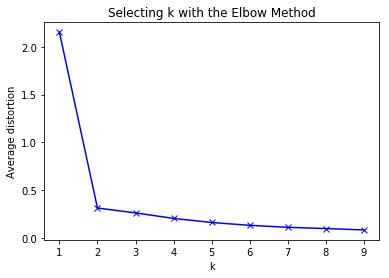

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
# Compute distance between each pair of the two collections of inputs.
# spatial distance d(ij) = |xi − xj|2

import matplotlib.pyplot as plt

cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
# an array of 2 rows 10 columns i.e 20 data points
cluster2 = np.random.uniform(3.5, 4.5, (2, 10))
# another array with points bw 3.5 and 4.5

#plt.scatter(cluster1,cluster2)

X = np.hstack((cluster1,cluster2)).T

# Transpose of Stack arrays in sequence horizontally col wise.
# 10 instances of cluster 1 then 10 instances of cluster 2 for row 1
# 10 instances of cluster 1 then 10 instances of cluster 2 for row 2
# Transpose of (20 by 2) = 2 by 20 matrix - 2 cols and 20 rows =40 cases   

#X = np.vstack((cluster1,cluster2)).T
print("HStack:\n",X)

# Stack arrays in sequence vertically (row wise).
# c1 c1 c1 c1 c1 c1......c1
# c1 c1 c1..........
# c2 c2 c2 c2 c2 c2........
# c2 c2 c2 c2...............
# 4 rows of shape 4 by 10= 40 instances  
# Transpose becomes 10 rows by 4 columns
# c1 c1 c2 c2
# c1 c1 c2 c2
# ...........
# 10rows.....4 cols
K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    print("K =",k," Cluster Centroids\n")
    print(kmeans.cluster_centers_)
    print("CDist: \n",cdist(X, kmeans.cluster_centers_, 'euclidean'))
    print("Minimum Distance",np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))
    print("Sum of Distances",sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)))
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    print("Mean Distortion: ",meandistortions[k-1])
print("Mean Distortion Array: ",meandistortions)
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()
# Note: The average distortion improves 
# rapidly as we increase K from 1 to 2. 
# There is little improvement for values 
# of K greater than 2.
# the rate of improvement to the average distortion declines the most when adding a
# fourth cluster, that is, the elbow method confirms that K should be set to 3 for
# this dataset.

#### Conclusion: 
The elbow method plots the value of the cost function produced by different values of K. As K increases, the average distortion will decrease; each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements to the average distortion will decline as K increases. __The value of K at which the improvement to the distortion declines the most is called the elbow.__

# silhouette coefficient. 
The silhouette coefficient is a measure of
the compactness and separation of the clusters. It increases as the quality of the clusters increase; it is large for compact clusters that are far from each other and small for large, overlapping clusters. 
The silhouette coefficient is calculated per instance; for a set of instances, i.e it is calculated as the mean of the individual samples' scores.
### s = ba/max(a,b), 
##### where a = mean distance between the instances in the cluster and b = the mean distance
##### between the instance and the instances in the next closest cluster.


The following code runs K-Means four times to create two, three, four, and eight clusters
from a toy dataset and calculates the silhouette coefficient for each run

X=
 [[1 1]
 [2 3]
 [3 2]
 [1 2]
 [5 8]
 [6 6]
 [5 7]
 [5 6]
 [6 7]
 [7 1]
 [8 2]
 [9 1]
 [7 1]
 [9 3]]


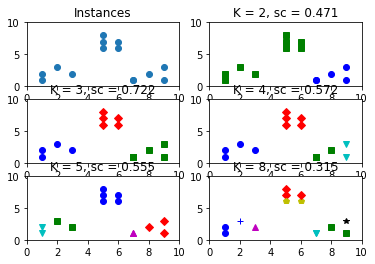

In [5]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
plt.subplot(3, 2, 1)    # total 6 subplots
# 3 args - the number of rows, the number of columns, and the index of the plot to be created
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X=np.array(list(zip(x1, x2)))
print("X=\n",X)
#X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
#print(X.shape)
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Instances')
plt.scatter(x1, x2)   #subplot 1
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
tests_K = [2, 3, 4, 5, 8]
subplot_counter = 1
for t in tests_K:
    subplot_counter += 1    #subplot = 2,3,4,5,6
    plt.subplot(3, 2, subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(X)
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l])
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    plt.title('K = %s, sc = %.03f' % (t, metrics.silhouette_score(X, kmeans_model.labels_,metric='euclidean')))
plt.show()
# Ideal K =3 with highest silhoutte score

### The dataset contains three obvious clusters. Accordingly, the silhouette coefficient
is greatest when K is equal to three. Setting K equal to eight produces clusters of
instances that are as close to each other as they are to the instances in some of the
other clusters, and the silhouette coefficient of these clusters is smallest.

In [21]:
# Eucledian Distance 
#1.27281059 0.50184557 3.80471104 4.11613914
#0.99316701 0.89398332 3.97791358 3.89529539]

print((1.27281059-0.99316701)+(0.89398332-0.50184557)+(3.97791358-3.8047114)+(4.11613914-3.89529539))

1.0658272599999998


# Conclusion
Each cluster's distortion is equal to the sum of the
squared distances between its centroid and its constituent instances. The distortion is
small for compact clusters and large for clusters that contain scattered instances. The
parameters that minimize the cost function are learned through an iterative process
of assigning observations to clusters and then moving the clusters. First, the clusters'
centroids are initialized to random positions. In practice, setting the centroids'
positions equal to the positions of randomly selected observations yields the best
results. During each iteration, K-Means assigns observations to the cluster that they
are closest to, and then moves the centroids to their assigned observations' mean
location. Let's work through an example by hand using the training data shown in
the following